<a href="https://colab.research.google.com/github/antonioomodho/Applied-Machine-Learning/blob/main/Decision_Tree_with_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Applied Machine Learning CMP7239***

## Decision Tree

## Dr. Mohamed Ihmeida

## Introduction to Decision Tree

***TASK***

* Ensure that you run and comprehend the code. The Decision Tree operates on the Iris dataset, which we previously discussed.
* You must save a copy of the code on GitHub, make it public, and share your link when submitting your Session 4 work.
* This practice is beneficial for submitting your code for CW1.

**Decision trees** are a popular and powerful tool used in various fields such as `machine learning`, data mining, and statistics.


They provide a clear and intuitive way to make decisions based on data by modeling the relationships between different variables.


This session focus on what decision trees are, how they work, their advantages and disadvantages, and their applications

What is a Decision Tree?

* A decision tree in machine learning is a versatile, interpretable algorithm used for predictive modelling.

* It structures decisions based on input data, making it suitable for both `classification` and `regression` tasks

*  A decision tree is a `flowchart-like structure` used to make decisions or predictions.

*  It consists of nodes representing decisions or tests on attributes, branches representing the outcome of these decisions, and leaf nodes representing final outcomes or predictions.


* Each internal node corresponds to a test on an attribute, each branch corresponds to the result of the test, and each leaf node corresponds to a class label or a continuous value.

**Structure of a Decision Tree**

1. **Root Node**: Represents the entire dataset and the initial decision to be made.

2. **Internal Nodes**: Represent decisions or tests on attributes. Each internal node has one or more branches.

3. **Branches**: Represent the outcome of a decision or test, leading to another node.

4. **Leaf Nodes**: Represent the final decision or prediction. No further splits occur at these nodes.

![DT-structure](https://www.statlect.com/images/decision-tree-structure.png)

# Advantages of Decision Trees

1.**Simplicity and Interpretability**: Decision trees are easy to understand and interpret. The visual representation closely mirrors human decision-making processes.

2.**Versatility**: Can be used for both classification and regression tasks.

3.**No Need for Feature Scaling**: Decision trees do not require normalization or scaling of the data.

4.**Handles Non-linear Relationships**: Capable of capturing non-linear relationships between features and target variables.

# Disadvantages of Decision Trees

1.**Overfitting**: Decision trees can easily overfit the training data, especially if they are deep with many nodes.

2.**Instability**: Small variations in the data can result in a completely different tree being generated.

3.**Bias towards Features with More Levels**: Features with more levels can dominate the tree structure.

**Applications of Decision Trees**

* *`Business Decision Making`*: Used in strategic planning and resource allocation.

* *`Healthcare`*: Assists in diagnosing diseases and suggesting treatment plans.

* *`Finance`*: Helps in credit scoring and risk assessment.

* *`Marketing`*: Used to segment customers and predict customer behavior

In [1]:
# Import necessary libraries ## Ask Students to helps with this import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
# import confusionmatrix, f1_score



In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target




In [3]:
# Convert the dataset into a DataFrame for better EDA
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = y

In [4]:
# Display basic information
print("Dataset Overview:")
print(iris_df.head())
print("\nBasic Statistics:")
print(iris_df.describe())
print("\nClass Distribution:")
print(iris_df['target'].value_counts())

Dataset Overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000  

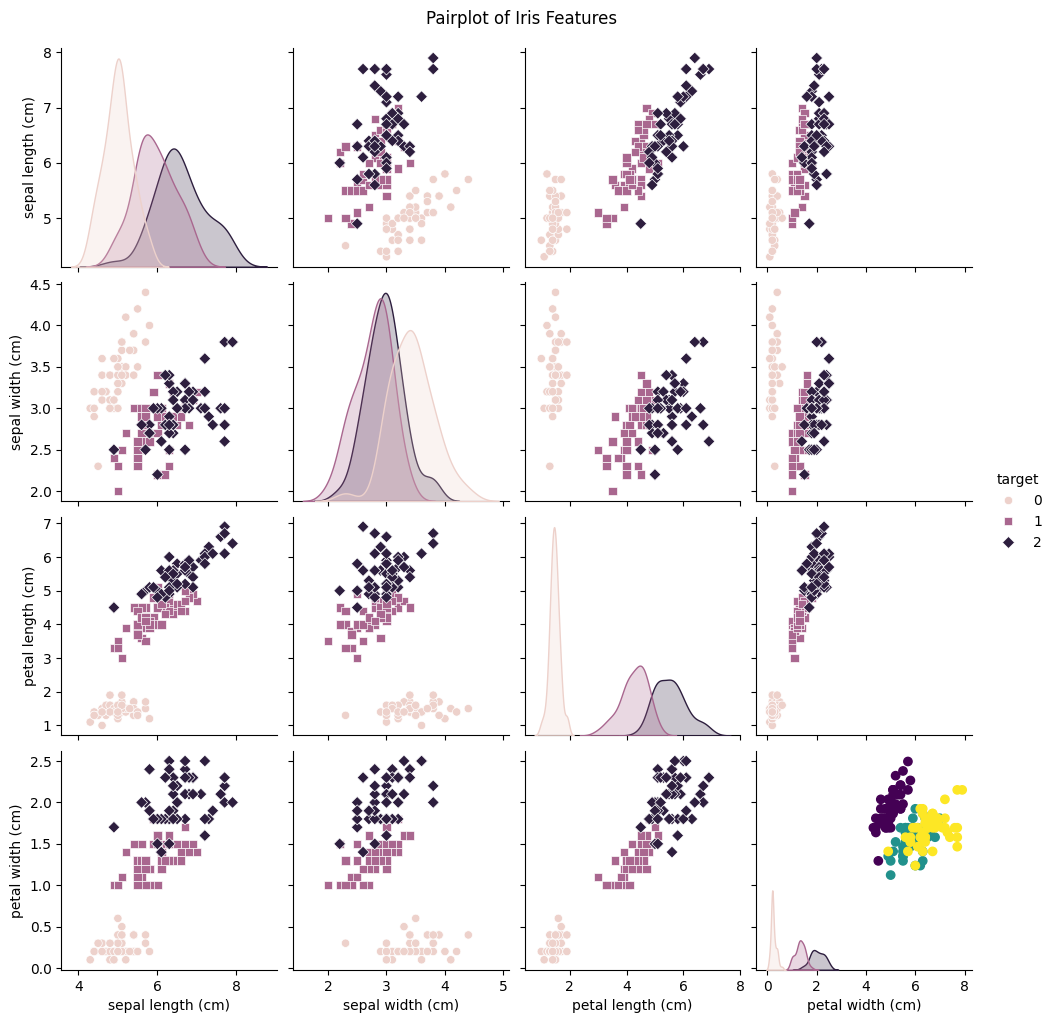

In [15]:
# Pairplot for data visualization
sns.pairplot(iris_df, hue='target', diag_kind='kde', markers=["o", "s", "D"])   # Try to use pairplot, plt.scatter, and plot feature 1 and feature 2 similar to last session 10
plt.scatter(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'], c=iris_df['target'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


In [7]:
# Splitting data for modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
# Predict on the test set
y_pred = clf.predict(X_test)



In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")  # why we need "F" in the print statment



Accuracy of the Decision Tree model: 1.00


In [11]:
### how will you be able to print the confusion metrics and F1-Score?? you may need to look to last session
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
F1 Score: 1.0


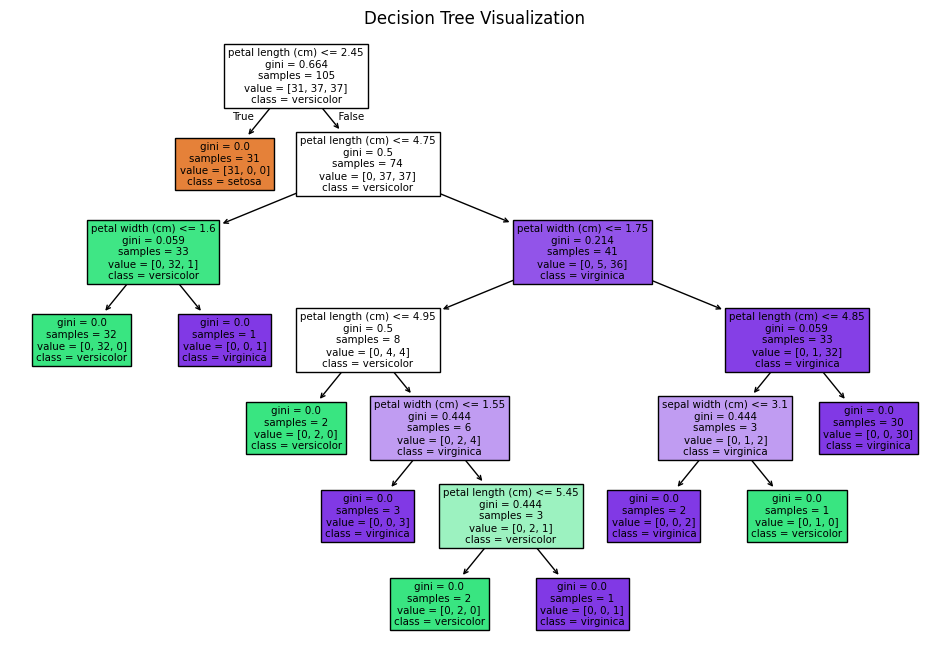

In [17]:
# Visualise the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()



In [13]:
# Display feature importance
feature_importances = pd.DataFrame(clf.feature_importances_, index=iris.feature_names, columns=["Importance"])
print("Feature Importances:")
print(feature_importances)

Feature Importances:
                   Importance
sepal length (cm)    0.000000
sepal width (cm)     0.019110
petal length (cm)    0.893264
petal width (cm)     0.087626



***Task2***
Save the decision tree model and uploaded to GitHub as well.



In [19]:
from joblib import Parallel, delayed
import joblib

#save the model as a pickie in a file
joblib.dump(clf, 'decision_tree_model.joblib')


['decision_tree_model.joblib']